In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist

In [2]:
def sammon(X, iter_max, error_threshold, learning_rate):
    n_samples, n_features = X.shape
    
    # Step 1: Initialize a random two-dimensional layout Y of points
    y = np.random.normal(1, 5, [n_samples, 2])

    distX = pdist(X, 'euclidean')
    sum_delta_ij = np.sum(distX)

    for _ in range(iter_max):
        # Step 2: Compute the stress E of Y
        distY = pdist(y, 'euclidean')
        sum_distance = np.sum(((distX - distY) ** 2) / distX)
        stress = sum_distance / sum_delta_ij

         # Step 3: If E < error_threshold or maximum iterations reached, stop
        if stress < error_threshold:
            return y

        gradient1 = np.zeros((n_samples, 2))
        gradient2 = np.zeros((n_samples, 2))

        for i in range(n_samples):
            for j in range(n_samples):
                if j != i:
                    X_diff = X[i] - X[j]
                    y_diff = y[i] - y[j]
                    delta_ij = np.sqrt(np.sum(X_diff ** 2))
                    d_ij = np.sqrt(np.sum(y_diff ** 2))
                    divergence = delta_ij - d_ij
                    denominator = d_ij * delta_ij

                    # Handling division by zero
                    if denominator < 1e-6:
                        denominator = 1e-6

                    # Calculating the gradients
                    gradient1[i] += (divergence / denominator) * y_diff
                    gradient2[i] += (1 / denominator) * (
                            divergence - ((y_diff ** 2) / d_ij) * (1 + divergence / d_ij))

        # Step 4: Update yi(t + 1) based on the current yi(t)
        deltai_t = -2 * learning_rate * gradient1 / np.abs(gradient2)
        y += deltai_t

    return y

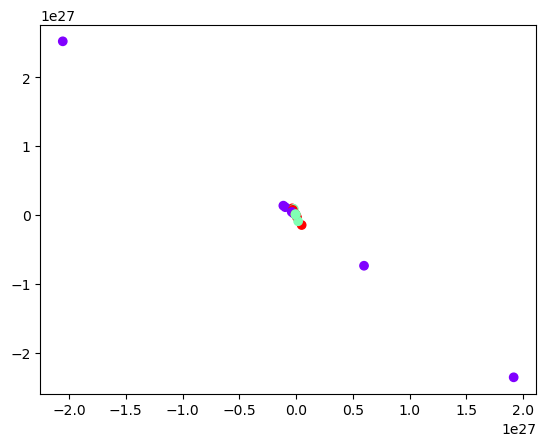

In [3]:
X, y = make_blobs(n_samples=20, n_features=3)
embedding = sammon(X, iter_max=100, error_threshold=0.0, learning_rate=0.3)

plt.figure(1)
plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='rainbow')
plt.show()